## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 32,561 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Read data from file

In [2]:
df = pd.read_csv("adult_eda.csv")

In [3]:
df.sample(7)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7049,22,?,182771,Assoc-voc,11.0,Never-married,?,NaN,Asian-Pac-Islander,Male,0,0,20,United-States,<=50K
21787,20,Private,219262,11th,7.0,Never-married,Craft-repair,Not-in-family,White,Male,0,0,60,United-States,<=50K
17870,23,Private,53245,Bachelors,13.0,Never-married,Sales,Not-in-family,White,Male,0,1602,12,United-States,<=50K
31730,50,Private,107665,Some-college,10.0,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
1209,36,Private,135289,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K
22944,38,Private,224566,Assoc-voc,11.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,50,United-States,<=50K
20502,52,Private,177366,HS-grad,9.0,Separated,Other-service,Other-relative,White,Female,0,0,20,United-States,<=50K


## Try to understand what the data looks like? What are data types of the features? Are there any missing values?

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.isna().sum()[df.isna().sum() > 0]

education-num     802
relationship     5068
dtype: int64

## Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.

In [8]:
df.select_dtypes('object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,NaN,White,Male,United-States,<=50K


In [9]:
df.select_dtypes('object').describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [11]:
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [13]:
for col in df.select_dtypes('object'):
    print(col)
    print("****************")
    print(df[col].value_counts())
    print("****************\n")

workclass
****************
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
****************

education
****************
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
****************

marital-status
****************
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse  

In [16]:
df.isin(['?']).any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [19]:
df = df.replace("?", "Unknown")
# for col in df.select_dtypes('object'):
#     df[col].replace('?', "Unknown", inplace=True)

In [20]:
for col in df.select_dtypes('object'):
    print(col)
    print("****************")
    print(df[col].value_counts())
    print("****************\n")

workclass
****************
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
****************

education
****************
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
****************

marital-status
****************
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse  

In [24]:
df.isin('?').sum()

TypeError: only list-like or dict-like objects are allowed to be passed to DataFrame.isin(), you passed a 'str'

## Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [25]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


In [27]:
df.education.value_counts(dropna=False)

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [28]:
df["education-num"].value_counts(dropna=False)

education-num
9.0     10215
10.0     7098
13.0     5247
14.0     1687
11.0     1343
7.0      1146
12.0     1044
6.0       916
NaN       802
4.0       631
15.0      559
5.0       503
8.0       424
16.0      405
3.0       330
2.0       161
1.0        50
Name: count, dtype: int64

In [29]:
df.groupby("education")["education-num"].value_counts(dropna=False)

education     education-num
10th          6.0                916
              NaN                 17
11th          7.0               1146
              NaN                 29
12th          8.0                424
              NaN                  9
1st-4th       2.0                161
              NaN                  7
5th-6th       3.0                330
              NaN                  3
7th-8th       4.0                631
              NaN                 15
9th           5.0                503
              NaN                 11
Assoc-acdm    12.0              1044
              NaN                 23
Assoc-voc     11.0              1343
              NaN                 39
Bachelors     13.0              5247
              NaN                108
Doctorate     16.0               405
              NaN                  8
HS-grad       9.0              10215
              NaN                286
Masters       14.0              1687
              NaN                 36
Preschool 

In [32]:
df.drop('education-num', axis=1, inplace=True)
df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


## 6 mpute missing value in relationship column with "Unmaried". Also replace "Not-in-family", "Other-relative" values in this column with "Unmaried"?

In [33]:
df.relationship.value_counts(dropna=False)

relationship
Husband           13193
Not-in-family      8305
NaN                5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [36]:
df['marital-status'].value_counts(dropna=False)

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [39]:
df.groupby('relationship')['marital-status'].value_counts(dropna=False)

relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unmarried       Divorced                  1601
                Never-married              881
                Separated                  451
                Widowed                    383
                Married-spouse-absent      130
Wife            Marrie

In [40]:
df.relationship.replace(["Not-in-family","Other-relative", np.nan], "Unmarried", inplace=True)

In [42]:
df.relationship.value_counts(dropna=False)

relationship
Unmarried    17800
Husband      13193
Wife          1568
Name: count, dtype: int64

In [43]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## 7 Take a look at correlation between variables and also see if there are some outliers in any of the columns

In [48]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [45]:
df.select_dtypes("number").corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


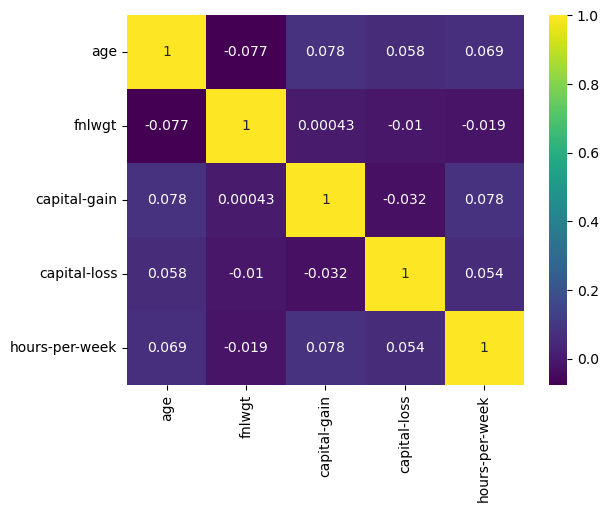

In [47]:
corr_df = df.select_dtypes("number").corr()
sns.heatmap(data=corr_df, annot=True, cmap="viridis");

## find outlier values which extends the upper limit in both age and hours - per - week columns

age

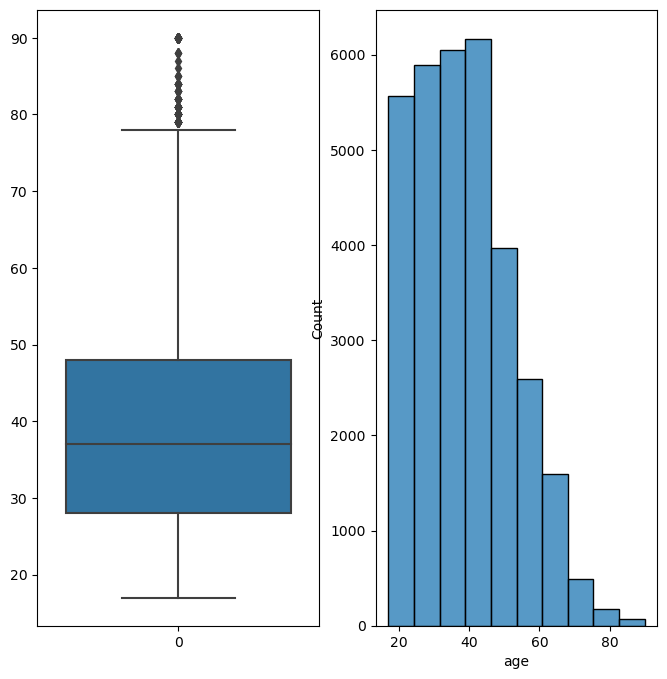

In [52]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.boxplot(data = df.age, whis=1.5)
plt.subplot(1,2,2)
sns.histplot(data= df.age,bins=10);

In [54]:
df[df.age>76]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
74,79,Private,124744,Some-college,Married-civ-spouse,Prof-specialty,Unmarried,White,Male,0,0,20,United-States,<=50K
222,90,Private,51744,HS-grad,Never-married,Other-service,Unmarried,Black,Male,0,2206,40,United-States,<=50K
316,77,Self-emp-not-inc,138714,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
430,80,Unknown,107762,HS-grad,Widowed,Unknown,Unmarried,White,Male,0,0,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,90,Private,313749,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,90,Local-gov,214594,7th-8th,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K
32459,85,Private,98611,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32494,82,Unknown,403910,HS-grad,Never-married,Unknown,Unmarried,White,Male,0,0,3,United-States,<=50K


hours-per-week

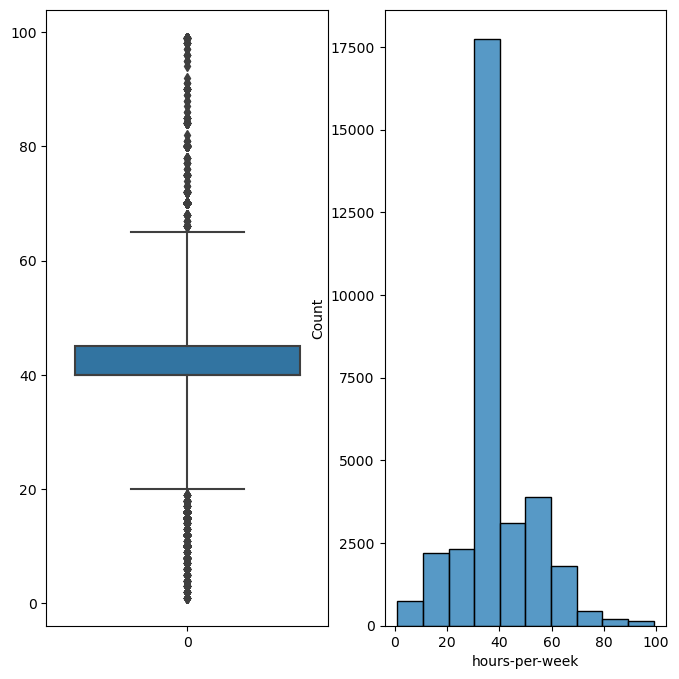

In [58]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.boxplot(data = df["hours-per-week"], whis=4)
plt.subplot(1,2,2)
sns.histplot(data= df["hours-per-week"],bins=10);

## After looking att the outliers you can drop the rows which actually does not make any sense


## how many of each race are represented in this dataset

## what is average age of men/women

## what is the percent of people who have a bachelor's degree

## what percent of people with advanced education(bachelors, masters, or doctorate) make more than 50K?

## what percent of people without advanced education(bachelors, masters, or doctorate) make more than 50K?